India Paints factory produces paints in various colours. The factory has a single production line that can produce only one colour in a given moment. Its capacity is also limited, i.e., 1000 litres per day regardless of the colour produced. Different colours have different production costs and are sold at different prices, for e.g., white is cheap to produce and is selling price is low. Gold is expensive to produce because metal sand has to be added in the paint to give it a shiny note. Gold is also sold at higher price. Red lies somewhere in between. Different customer requires different amount of paint variants. They need your help in selecting the mix of production that maximise the profit.
For this problem we can assume that there is no dependency of one paint on the other. If there are multiple solutions with same profit, choose the one which results in maximum utilization of production capacity and selection of paints as well.

Instructions for use of Python:
1. Implement the above problem statement using Python 3.7.
2. Use only native data types like lists and tuples in Python, do not use dictionaries provided in Python. Use of external libraries like graph, numpy, pandas library etc. is not allowed. The
purpose of the assignment is for you to learn how these data structures are constructed and how they work internally.
3. Create a single *.py file for code. Do not fragment your code into multiple files.

Requirements:

1. Formulate an efficient *recursive algorithm using Dynamic Programming* to determine how to select the paints to be produced and maximize production.
2. Analyse the time complexity of your algorithm.
3. Implement the above problem statement using Python 3.7.

In [1]:
import os, sys
import matplotlib.pyplot as plt
import logging
from IPython.core.display import Image, display

class KnapsackOptimization():
    def __init__(self, itemLength, capacity):
        
        """
        Implementing memoization to reuse the solutions to recurring subproblems.
        For Caching the subproblem's results we use cache : [itemLength+1][capacity+1]
        The below also includes taking no items & also capacity = 0
        """
        self.cache = [[0 for i in range(capacity+1)] for j in range(itemLength+1)]
    
    def knapSack(self, W, weights, profits, n):
        '''
        Case I : An optimal solution for the first (n-1) items with Knapsack capacity W.
        Case II : An optimal solution for the first (n-1) items with Knapsack capacity W - w[n]
        and supplemented with the last item n.
        
        W: Maximum weight capacity of knapsack 
        weights: List of weights
        profits: List of corresponding profits
        n: Size of weights/profits
        return: Solution to max profits (Integer)
        
        Recursive approach runs with an exponential complexity, which is [Choosing an item or not] :-  O(2^N)
        To overcome this runtime complexity drawback, we can use Dynamic Programming using memoization.
        Taking 'N' is the number of items and 'C' is the knapsack capacity
        Note : Time Complexity of this solution is O(N*C).
        
        The algorithm will be using O(N*C)O(N∗C) space for the memoization array. 
        We will use O(N)O(N) space for the recursion call-stack. 
        So the total space complexity will be O(N*C + N)O(N∗C+N), which is asymptotically equivalent to O(N*C)O(N∗C).
        '''
        if n == 0 or W == 0: # No item or Capacity
            return 0
        
        if self.cache[n][W] != 0: # Means already computed
            return self.cache[n][W]
        
        if weights[n-1] <= W: # If current weight is less than the Max Capacity. 
            
            # Case : I
            profitWithout = self.knapSack(W, weights, profits, n-1) 
            
            # Case : II
            profitWith = profits[n-1] + self.knapSack(W-weights[n-1], weights, profits, n-1)
            
            self.cache[n][W] = max(profitWith, profitWithout)
            return self.cache[n][W]
        
        elif weights[n-1] > W: # If weight is greater than the capacity itself use the optimal solution of Case I.
            self.cache[n][W] = self.knapSack(W, weights, profits, n-1)
            return self.cache[n][W]

In [2]:
def result(profitMatrix, knapsackCapacity, weights, profits):
    """
    Backtracking from the profit matrix to get the resultant item set.
    
    """
    items = []
    w = knapsackCapacity
    n = len(weights)

    print("The paints that should be funded: ", end='', flush=True)

    for n in range(n, 0, -1):
        if profitMatrix[n][w] != 0 and profitMatrix[n][w] != profitMatrix[n-1][w]:
            items.append(n)
            w = w - weights[n-1]
            
    paintsChosen = sorted(items)
    totalPaints = len(paintsChosen)
    for idx,paints in enumerate(paintsChosen, 1):
        if idx == totalPaints:
            end = ''
        else:
            end = ','
        print(paints, end = end)
    print()

    T = [weights[i-1] for i in sorted(items)]
    weightsUsed = [weights[i-1] for i in sorted(items)]
    
    print("Total benefit:", profitMatrix[len(weights)][knapsackCapacity])
    print('Capacity remaining:', knapsackCapacity - sum(T))



In [3]:
def readFile(inputFile):
    for x in inputFile:
        x = x.split('/')
        paintCodes.append(int(x[0].strip()))
        weights.append(int(x[1].strip()))
        profits.append(int(x[2].strip()))

    return paintCodes, weights, profits

In [4]:
if __name__ == '__main__':

    cwd = os.getcwd()
    path = os.path.join(cwd, "inputPS16Knapsack.txt")
    
    paintCodes = []
    weights = []
    profits = []
    
    inputFile = open(path, "r") # To be sent to the readInputfile
    knapsackCapacity = 1000
    paintCodes, weights, profits = readFile(inputFile)
    
    # orig_stdout = sys.stdout
    # f = open('outputPS16Knapsack.txt', 'w')
    # sys.stdout = f
    
    ks = KnapsackOptimization(len(weights), knapsackCapacity)
    ks.knapSack(knapsackCapacity, weights, profits, len(profits))
    profitMatrix = ks.cache # np.asarray(ks.cache)
    
    result(profitMatrix, knapsackCapacity, weights, profits)


The paints that should be funded: 2,3,4,5,7,9
Total benefit: 281
Capacity remaining: 20


#### One alternate way of modelling the problem with the cost implications.

- Bottom-Up Approach : Populating our array from the above solution, we can work in a bottom-up fashion. 
Essentially, we will be finding the maximum profit for every sub-array and for every possible capacity. Cache[i][c] will represent the maximum knapsack profit for capacity 'c' calculated from the first 'i' items.

Using the below cases for finding the optimal values for a knapsack:
- Case I : An optimal solution for the first (n-1) items with Knapsack capacity W.
- Case II : An optimal solution for the first (n-1) items with Knapsack capacity W - w[n], supplemented with the last item n.

This tabular approach will have time and space complexity of O(N*C)O(N∗C), where 'N' represents total items, and 'C is the maximum capacity of the Knapsack.

So, at every step, we will have two options: 
- Include an item or skip it. 
- If we skip an item, then we take the profit from the remaining items (i.e., from the cell right above it)
- If we include the item, then we jump to the remaining profit to find more items.

We can backtrack using a reconstruction algorithm and retrace the items used to get the maximum profit.

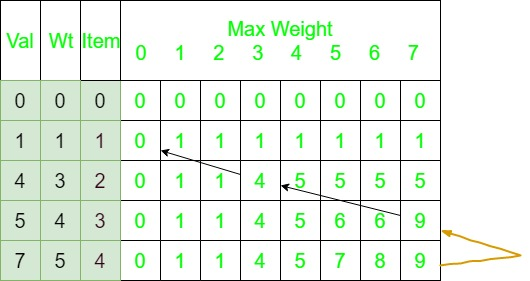

In [5]:
path = r'C:/Users/abhishek_sharma39/Documents/reconstruction.jpg'
display(Image(filename = path, width=600, height=600));